# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 01__

__Nombres de los estudiantes: María Arranz y Celia Rubio__

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [57]:
import pandas as pd
filename = './countries_of_the_world.csv' 
df = pd.read_csv(filename) # importo
df = df.drop(['Region'],axis=1) # elimino región
df = df.dropna(axis=0) # elimino países con null
df # esta es la tabla resultante

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
219,Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
224,Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


**Contiene 179 paises y 19 variables (número de filas y de columnas).**

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [58]:
variables = ['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Agriculture','Industry','Service'] # las variables con las que queremos quedarnos
df2 = df.loc[:,variables] # la vista resultante es df2
df2.describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,9125.698324,81.944134,208.151955,0.156905,0.288028,0.554508
std,9644.123141,19.837537,210.121875,0.151343,0.140310,0.165670
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1800.000000,69.950000,27.100000,0.039000,0.197000,0.424500
50%,5100.000000,90.900000,137.100000,0.101000,0.274000,0.559000
75%,12950.000000,97.800000,335.000000,0.233000,0.349000,0.668500
max,37800.000000,100.000000,898.000000,0.769000,0.906000,0.954000


La variable **GDP ($ per capita)** representa el producto interior bruto, que es el valor monetario de cada país a lo largo de un año, pero calculado por cada habitante. De media son alrededor de 10000 dólares por habitante, con desviación de alrededor de 10000 luego es bastante alta (implica una alta desigualdad). En concreto, el mínimo es de 500 y el máximo es de 37800; viendo los percentiles se ve que hay muchos países más pobres que ricos.

La variable **Literacy (%)** representa el porcentaje de habitantes del país que sabe leer/escribir. La media es de 82%, lo cual es alto, con desviación de 20%. El mínimo es 17, que es muy bajo con respecto al resto; el máximo es 100 (hay al menos un país cuyos habitantes saben todos leer/escribir), y el percentil 50 es de 91, luego hay muchos países con esta variable alta.

La variable **Phones (per 1000)** representa el número de móviles propiedad de los habitantes del país, por cada mil habitantes. La media es de 208, es decir, que uno de cada cinco personas tienen móvil, con desviación de 210. El mínimo es 0.2 (luego es un 0.02% de la población, muy bajo), y el máximo de casi 900; pero el percentil 75% es de 335, luego hay pocos países con tantos móviles en comparación.

Las variables **Agriculture**, **Industry** y **Service** representan el porcentaje de trabajos relacionados con cada uno de los tres sectores de producción. La media es (16,29,55), luego más de la mitad es del sector servicios; las desviaciones rondan el 15%. Hay países sin sector primario, pero ninguno tiene más del 77% de él; casi todos están por debajo del 25%. La industria obtiene un porcentaje ligeramente más alto, llegando en algún país al 90% pero con tres cuartas partes bajo 35%. El sector servicios es el mayor a grandes rasgos, aunque algún país lo tiene en 6%; solamente el 25% lo tienen por debajo del 43%.

In [59]:
df2.corr()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.522880,0.883520,-0.616919,0.032855,0.536551
Literacy (%),0.522880,1.000000,0.592042,-0.620514,0.105703,0.474395
Phones (per 1000),0.883520,0.592042,1.000000,-0.631578,-0.084247,0.649638
Agriculture,-0.616919,-0.620514,-0.631578,1.000000,-0.352785,-0.613489
Industry,0.032855,0.105703,-0.084247,-0.352785,1.000000,-0.521413
Service,0.536551,0.474395,0.649638,-0.613489,-0.521413,1.000000


La variable **GDP ($ per capita)** está altamente correlacionada con **Phones (per 1000)** con un factor de 0.88, que es muy alto; es decir, cuanto más rico es el país, más móviles se tiene, y viceversa. En cambio, con las variables **Literacy (%)** y **Service** tiene un factor de aproximadamente 0.50, que también es alto; mientras que está inversamente relacionado con **Agriculture**, con -0.62. No parece estar correlacionada con **Industry**, con un factor 0.03.

En general, todas parecen estar relacionadas con factores de entre 0.5 y 0.7 (o su inversa con **Agriculture**) salvo con **Industry**, que solo tiene correlación inversa de -0.52 con **Service**, que tiene sentido ya que las tres variables suman 1 y si **Agriculture** es en general bajo, entonces las otras dos están relacionadas.

Parece que el dinero del país y el número de móviles están relacionados, así como si tiene poca agricultura y más servicios; además los países ricos tienen menor analfabietismo. En cambio, no parece ser tan relevante cuánta industria tiene, salvo para calcular cuánto sector servicios tiene.

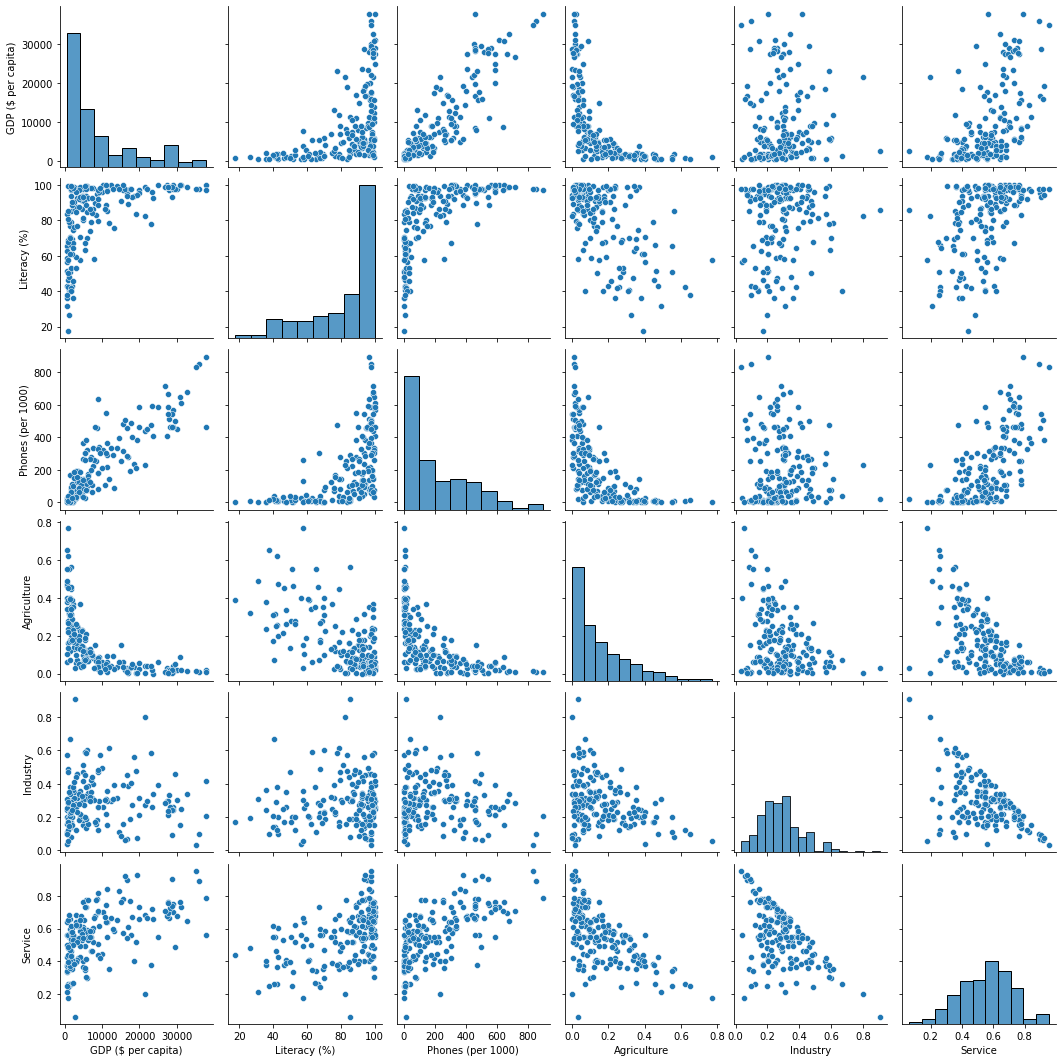

In [60]:
import seaborn as sns

sns.pairplot(df2) # explicación abajo


Lo comentado anteriormente se puede visualizar en los diagramas superiores. Se ve que la variable industria no tiene mucha correlación con ninguna variable, salvo con las que tiene que sumar 1. Se ve que entre GDP y móviles la gráfica tiene forma de recta. Así como la forma de las distribuciones de cada variable que también se han comentado.

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

**Es necesario cambiar la escala de datos porque la escala de cada variable es muy distinta, por ejemplo Service es un porcentaje 0-1 mientras que GDP son dólares al año, de media 10000. Preferimos usar un reescalado porque las distribuciones originales son muy diversas y no queremos cambiarlas.**

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df2)
X = scaler.transform(df2) # X es el array de datos escalados
pd.DataFrame(X,columns=variables).describe() # estos son los nuevos datos como dataframe, vemos que ya están escalados con min=0 y max=1.

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.231252,0.780875,0.231624,0.204038,0.292938,0.552139
std,0.258556,0.240747,0.234041,0.196805,0.160537,0.185728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.034853,0.635316,0.029962,0.050715,0.188787,0.406390
50%,0.123324,0.889563,0.152484,0.131339,0.276888,0.557175
75%,0.333780,0.973301,0.372912,0.302991,0.362700,0.679933
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [62]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

RANDOM_STATE=333 # no somos muy originales
K_MIN = 2
K_MAX = 10
score = np.zeros(K_MAX-K_MIN)
davies_boulding = np.zeros(K_MAX-K_MIN)
silhouette = np.zeros(K_MAX-K_MIN)
for k in range(K_MIN, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE) # el kmeans k=k
    km.fit(X) # se fitea
    # las tres gráficas
    score[k-K_MIN] = -1 * km.score(X)
    davies_boulding[k-K_MIN] = davies_bouldin_score(X, km.labels_)
    silhouette[k-K_MIN] = silhouette_score(X, km.labels_)

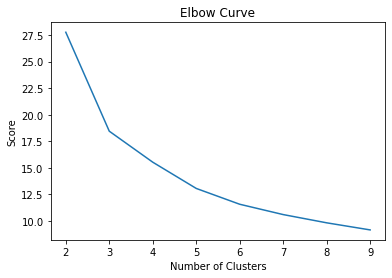

In [63]:
# diagrama del codo
plt.plot(range(K_MIN, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

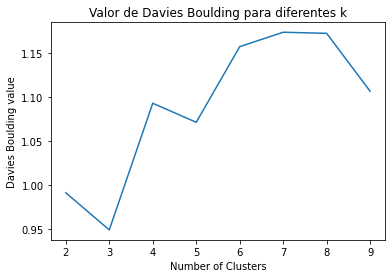

In [64]:
# davies boulding
plt.plot(range(K_MIN, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

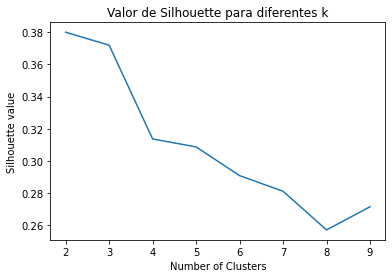

In [65]:
# silhouette
plt.plot(range(K_MIN, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

Observamos que el diagrama del codo baja rápidamente de k=2 a k=3, y suaviza la curva a partir de ahí. En cuanto a Davies Boulding, el valor mínimo se da en k=3, con k=2 cercano. Y por último, el valor de Silhouette se maximiza en k=2, con k=3 cercano. Esto implica que los países se pueden dividir fácilmente en 2 o 3 clústers, y hemos escogido k=3 por ser el mejor en 2 de los 3 diagramas.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [66]:
km = KMeans(init='random', n_clusters=3, random_state=RANDOM_STATE)
km.fit(X)

centers = km.cluster_centers_ # los centroides de cada clúster... 
centers

array([[0.02629628, 0.4367641 , 0.0188783 , 0.44307335, 0.22936852,
        0.40912127],
       [0.6325067 , 0.96256068, 0.59030129, 0.03569571, 0.24439359,
        0.74515135],
       [0.16149901, 0.87767782, 0.1843625 , 0.15511393, 0.34652025,
        0.54128485]])

In [67]:
import pandas as pd

# crear data frame con los puntos originales (df2)
df_todos = pd.DataFrame(data=df)
# añadir una columna con el cluster al que pertenece cada punto
df_todos = df_todos.assign(cluster=km.labels_)

df = df_todos.loc[:,variables+['cluster']]
df # comprobamos que la tabla es la correcta

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
0,700.0,36.0,3.2,0.380,0.240,0.380,0
1,4500.0,86.5,71.2,0.232,0.188,0.579,2
2,6000.0,70.0,78.1,0.101,0.600,0.298,2
6,8600.0,95.0,460.0,0.040,0.180,0.780,1
7,11000.0,89.0,549.9,0.038,0.220,0.743,1
...,...,...,...,...,...,...,...
218,4800.0,93.4,140.1,0.040,0.419,0.541,2
219,2500.0,90.3,187.7,0.209,0.410,0.381,2
224,800.0,50.2,37.2,0.135,0.472,0.393,0
225,800.0,80.6,8.2,0.220,0.290,0.489,2


In [68]:
# mostramos la matriz transpuesta para que la info salga en vertical
df.groupby(["cluster"]).describe().transpose()

cluster                             0             1             2
GDP ($ per capita) count    47.000000     40.000000     92.000000
                   mean   1480.851064  24092.500000   6523.913043
                   std     816.311508   7732.893030   4524.690981
                   min     500.000000   8600.000000    700.000000
                   25%     800.000000  17950.000000   3275.000000
                   50%    1300.000000  25900.000000   5450.000000
                   75%    1850.000000  29025.000000   9000.000000
                   max    4100.000000  37800.000000  21500.000000
Literacy (%)       count    47.000000     40.000000     92.000000
                   mean     53.589362     96.915000     89.920652
                   std      14.501683      3.872821      8.884504
                   min      17.600000     77.900000     58.000000
                   25%      42.300000     96.550000     85.025000
                   50%      52.900000     97.950000     92.250000
                   75%      65.950000     99.000000     97.350000
                   max      85.300000    100.000000     99.900000
Phones (per 1000)  count    47.000000     40.000000     92.000000
                   mean     17.148936    530.172500    165.720652
                   std      23.621378    138.167347    107.955035
                   min       0.200000    194.500000      3.700000
                   25%       3.600000    458.375000     75.075000
                   50%       9.700000    493.300000    141.500000
                   75%      19.550000    590.025000    260.525000
                   max     131.800000    898.000000    463.800000
Agriculture        count    47.000000     40.000000     92.000000
                   mean      0.340723      0.027450      0.119283
                   std       0.149452      0.019916      0.084219
                   min       0.073000      0.000000      0.002000
                   25%       0.243500      0.010750      0.058000
                   50%       0.322000      0.021500      0.099500
                   75%       0.424500      0.040000      0.164000
                   max       0.769000      0.086000      0.370000
Industry           count    47.000000     40.000000     92.000000
                   mean      0.232468      0.245600      0.334859
                   std       0.118078      0.115622      0.145356
                   min       0.040000      0.032000      0.088000
                   25%       0.167500      0.175000      0.229750
                   50%       0.204000      0.252000      0.311000
                   75%       0.281500      0.298000      0.412250
                   max       0.666000      0.585000      0.906000
Service            count    47.000000     40.000000     92.000000
                   mean      0.426936      0.726675      0.544826
                   std       0.124527      0.119561      0.134877
                   min       0.177000      0.375000      0.062000
                   25%       0.351500      0.671000      0.445000
                   50%       0.406000      0.729000      0.551500
                   75%       0.542000      0.780000      0.640750
                   max       0.643000      0.954000      0.818000

El clúster 2 (los intermedios) es el mayor, con 90 frente a 47 y 40 de 0 y 1. En cuanto a GDP, el clúster 1 (los más ricos) es muy alto mientras que el 2 es medio y el 0 bajo. Básicamente son los países más ricos 1 frente a los intermedios 2 y a los más pobres 0. 

La literacy de 0 es de media 50% mientras que de 2 y 1 son de 90 y 97, luego solo a los más pobres tiene efecto reflejado la carencia educativa. La cantidad de móviles separan bastante a los clústers, desde media ~17 (0) a media ~170 (2) a media ~530 (1). Como relevancia, los del clúster 1 tienen mínimo 194, más que la media de (2).

En cuanto a los tres sectores, ya hemos visto que la industria no estaba muy correlacionada y eso se muestra en que no separa igual de bien a los clústers, ya que habrán predominado el resto de variables. Es relevante ver entonces la media de agricultura en (0), 0.34, y de (2), 0.02 muy baja; y las de servicios de (0), 0.42, y (2), 0.72.

Todas estas observaciones se pueden ver también en la diagonal de diagramas de abajo del todo.

A continuación describiremos los clústers por separado con las próximas tablas.

In [69]:
df_todos[df_todos['cluster']==0].loc[:,['Country']].transpose()

,0,16,21,23,31,32,33,34,35,39,...,159,170,180,183,188,192,202,210,217,224
Country,Afghanistan,Bangladesh,Benin,Bhutan,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Central African Rep.,...,Papua New Guinea,Rwanda,Senegal,Sierra Leone,Somalia,Sudan,Togo,Uganda,Vanuatu,Yemen


In [70]:
df[df['cluster']==0].corr()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
GDP ($ per capita),1.000000,0.311253,0.755154,-0.415174,0.166969,0.337368,NaN
Literacy (%),0.311253,1.000000,0.129252,0.041108,-0.069959,0.014026,NaN
Phones (per 1000),0.755154,0.129252,1.000000,-0.453985,0.226168,0.328518,NaN
Agriculture,-0.415174,0.041108,-0.453985,1.000000,-0.585443,-0.643111,NaN
Industry,0.166969,-0.069959,0.226168,-0.585443,1.000000,-0.244243,NaN
Service,0.337368,0.014026,0.328518,-0.643111,-0.244243,1.000000,NaN
cluster,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La mayor correlación en el clúster 0 se encuentra entre GDP y Phones, con 0.76. Vemos que la anterior correlación de literacy con GDP se ha diluido con la división de clústers hasta 0.31 (para el clúster 2 es de casi 0). Sigue habiendo correlación inversa -0.42 entre GDP y agricultura (así como GDP y Phones); y positiva entre GDP y servicios 0.33, aunque más bajas por lo ya comentado.

In [71]:
df_todos[df_todos['cluster']==1].loc[:,['Country']].transpose()

,6,7,10,11,12,14,17,19,22,28,...,164,172,184,190,195,196,198,212,213,214
Country,Anguilla,Antigua & Barbuda,Aruba,Australia,Austria,"Bahamas, The",Barbados,Belgium,Bermuda,British Virgin Is.,...,Portugal,Saint Kitts & Nevis,Singapore,Spain,Sweden,Switzerland,Taiwan,United Arab Emirates,United Kingdom,United States


In [72]:
df[df['cluster']==1].corr()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
GDP ($ per capita),1.000000,0.313187,0.518328,-0.316171,0.173134,-0.112984,NaN
Literacy (%),0.313187,1.000000,0.161872,-0.007669,-0.262534,0.254141,NaN
Phones (per 1000),0.518328,0.161872,1.000000,-0.147117,-0.136856,0.162951,NaN
Agriculture,-0.316171,-0.007669,-0.147117,1.000000,0.118889,-0.280939,NaN
Industry,0.173134,-0.262534,-0.136856,0.118889,1.000000,-0.986221,NaN
Service,-0.112984,0.254141,0.162951,-0.280939,-0.986221,1.000000,NaN
cluster,NaN,NaN,NaN,NaN,NaN,NaN,NaN


El clúster 1, el de países más ricos, cambia la correlación a ligeramente inversa (y mucho más baja, -0.11) entre GDP y servicios, de nuevo por las diferencias con los países de otros clústers que ya no existen; y entre GDP y agricultura, de -0.31. En general se pierden más las diferencias entre estos países con respecto a estas variables, lo que es buena señal para el modelo.

In [73]:
df_todos[df_todos['cluster']==2].loc[:,['Country']].transpose()

,1,2,8,9,13,15,18,20,24,26,...,205,206,207,211,215,216,218,219,225,226
Country,Albania,Algeria,Argentina,Armenia,Azerbaijan,Bahrain,Belarus,Belize,Bolivia,Botswana,...,Tunisia,Turkey,Turkmenistan,Ukraine,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe


In [74]:
df[df['cluster']==2].corr()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
GDP ($ per capita),1.000000,0.008074,0.559129,-0.620168,0.297128,0.069566,NaN
Literacy (%),0.008074,1.000000,0.201781,0.211792,-0.174755,0.052793,NaN
Phones (per 1000),0.559129,0.201781,1.000000,-0.380411,-0.108768,0.358679,NaN
Agriculture,-0.620168,0.211792,-0.380411,1.000000,-0.400805,-0.194619,NaN
Industry,0.297128,-0.174755,-0.108768,-0.400805,1.000000,-0.818206,NaN
Service,0.069566,0.052793,0.358679,-0.194619,-0.818206,1.000000,NaN
cluster,NaN,NaN,NaN,NaN,NaN,NaN,NaN


El clúster intermedio (2) pierde la correlación entre GDP y literacy, y con servicios, pero no la de Phones, que cae a 0.55, ni la de agricultura, con -0.62. Curiosamente cambia a correlación directa entre literacy y agricultura, 0.21.

A continuación se muestran los diagramas de dispersión dibujados con colores por cada clúster.

In [ ]:
import seaborn as sns

sns.pairplot(df, hue = 'cluster')


Los clústers que se separan mejor son los países más pobres (0) frente a los más ricos (1). Los intermedios (2) están más pegados al clúster (1). Las variables que mejor separan son GDP y las altamente correlacionadas con ella, como Phones. La variable de industria es la que más se confunde, ya que, como hemos dicho antes, no tiene mucha correlación con el resto y es probable que el algoritmo no lo haya podido tener tan en cuenta.
